In [32]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math as math
import itertools
import os
import scipy

def read_csv(file_path):
    # Initialize empty arrays to store data
    X = []
    Y = []

    try:
        with open(file_path, 'r') as csvfile:
            # Create a CSV reader object
            csv_reader = csv.reader(csvfile)

            # Iterate through each row in the CSV file
            for row in csv_reader:
                # Assuming the CSV has two columns, append each column to the respective array
                if len(row) == 2:
                    X.append(float(row[0]))
                    Y.append(float(row[1]))
                else:
                    print(f"Skipping row {row}, as it does not have exactly two columns.")

        print("CSV file read successfully.")
        return X, Y

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [33]:
X, Y = [ [], [], [], [] ], [ [], [], [], [] ]
directory_path = './digitized_data/Jan15/'

files = os.listdir(directory_path)
i = 0

for file in files:
    X[i], Y[i] = read_csv(directory_path + file)
    i = i + 1

CSV file read successfully.
CSV file read successfully.
CSV file read successfully.
CSV file read successfully.


[  62.5   87.5  112.5  137.5  162.5  187.5  212.5  237.5  262.5  287.5
  312.5  337.5  362.5  387.5  412.5  437.5  462.5  487.5  512.5  537.5
  562.5  587.5  612.5  637.5  662.5  687.5  712.5  737.5  762.5  787.5
  812.5  837.5  862.5  887.5  912.5  937.5  962.5  987.5 1012.5 1037.5
 1062.5 1087.5 1112.5 1137.5 1162.5 1187.5 1212.5 1237.5 1262.5 1287.5
 1312.5 1337.5 1362.5 1387.5 1412.5 1437.5 1462.5 1487.5 1512.5 1537.5
 1562.5 1587.5 1612.5 1637.5 1662.5 1687.5 1712.5 1737.5 1762.5 1787.5
 1812.5 1837.5 1862.5 1887.5 1912.5 1937.5 1962.5 1987.5 2012.5 2037.5
 2062.5 2087.5 2112.5 2137.5 2162.5 2187.5 2212.5 2237.5 2262.5 2287.5
 2312.5 2337.5 2362.5 2387.5 2412.5 2437.5 2462.5 2487.5 2512.5 2537.5
 2562.5 2587.5 2612.5 2637.5 2662.5 2687.5 2712.5 2737.5 2762.5 2787.5
 2812.5 2837.5 2862.5 2887.5 2912.5 2937.5 2962.5 2987.5 3012.5 3037.5
 3062.5]


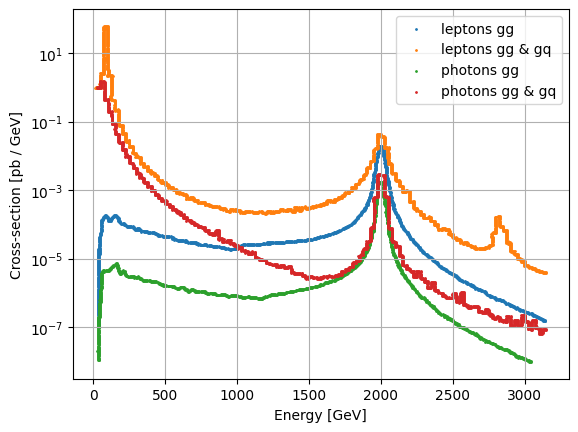

In [59]:
bins = np.arange(62.5, 3087.5, 25)
print(bins)
datasets = ['leptons gg', 'leptons gg & gq', 'photons gg', 'photons gg & gq']

def plot_arrays(X, Y, dataset):
    plt.scatter(X, Y, label=dataset, s=1)

fig, ax = plt.subplots()
plt.xlabel('Energy [GeV]')
plt.ylabel('Cross-section [pb / GeV]')
plt.grid('True')
plt.yscale('log')

for i in range(len(X)):
    plot_arrays(X[i], Y[i], datasets[i])

plt.legend()
plt.show()

In [61]:
def interpolate(X, Y):

    binned_Y = []

    for element in bins:             # need to iterate over each bin

        differences = []             # initialize array to store the difference between each element in X with a bin; need to get as close as possible to bin midpoint

        for i in range(len(X)):      # iterate over each entry in the X array (find the one closest to midpoint of bin

            differences.append( abs(element - X[i]) )     # put each difference into the difference array

        minimum = np.min(differences)                 # store the lowest value difference in a variable

        sum = 0                                       # initalize a sum that will be used to calculate the average
        counter = 0                                   # count the number of values with the lowest difference so we can divide the sum by this amount to find the average

        for i in range(len(differences)):                 # go back and iterate over every element of the differences; there might be more than one element with the same X

            if differences[i] == minimum:                 # check if the difference is equal to the minimum
                sum = sum + Y[i]                          # add the respective Y-value to the sum array
                counter = counter + 1                     # increase counter

        binned_Y.append( sum / counter )

    return binned_Y

In [62]:
def arrays_to_csv(X, Y, output_file):
    # Check if the lengths of X and Y match
    if len(X) != len(Y):
        raise ValueError("Lengths of input arrays X and Y must be the same.")

    # Combine X and Y into a list of tuples
    data = list(zip(X, Y))

    try:
        # Open the CSV file in write mode
        with open(output_file, 'w', newline='') as csvfile:
            # Create a CSV writer object
            csv_writer = csv.writer(csvfile)

            # Write the header if needed
            # csv_writer.writerow(['X', 'Y'])  # Uncomment this line if you want to add headers

            # Write the data
            csv_writer.writerows(data)

        print(f"Data successfully written to {output_file}")

    except Exception as e:
        print(f"An error occurred: {e}")

Data successfully written to ./digitized_data/Jan15/binned_CSVs/leptons gg
Data successfully written to ./digitized_data/Jan15/binned_CSVs/leptons gg & gq
Data successfully written to ./digitized_data/Jan15/binned_CSVs/photons gg
Data successfully written to ./digitized_data/Jan15/binned_CSVs/photons gg & gq


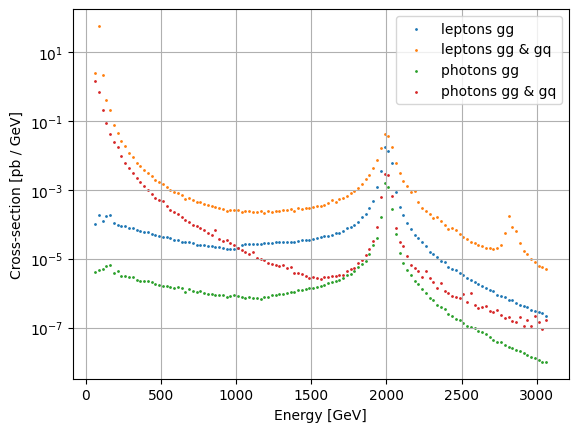

In [64]:
output_folder = './digitized_data/Jan15/binned_CSVs/'

fig, ax = plt.subplots()
plt.xlabel('Energy [GeV]')
plt.ylabel('Cross-section [pb / GeV]')
plt.grid('True')
plt.yscale('log')

for i in range(len(X)):
    plot_arrays(bins, interpolate(X[i], Y[i]), datasets[i])
    arrays_to_csv(bins, interpolate(X[i], Y[i]), output_folder + datasets[i])

plt.legend()
plt.savefig('./Figures/properly binned distributions.pdf',dpi=100,bbox_inches='tight')
plt.show()